In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor


import warnings
warnings.filterwarnings("ignore")

In [3]:
# preview the dataset
df = pd.read_csv('/Users/sourabhpandey/Desktop/ML_Assignment/data/Rotten_Tomatoes_Movies3.csv', encoding='ISO-8859-1')
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2/12/2010,6/29/2010,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",4/30/2010,10/19/2010,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",10/5/1979,8/27/1997,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",4/13/1957,3/6/2001,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1/1/1954,5/20/2003,127.0,Disney,Fresh,89,27,74.0


In [4]:
#get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   movie_info          16614 non-null  object 
 2   critics_consensus   8309 non-null   object 
 3   rating              16638 non-null  object 
 4   genre               16621 non-null  object 
 5   directors           16524 non-null  object 
 6   writers             15289 non-null  object 
 7   cast                16354 non-null  object 
 8   in_theaters_date    15823 non-null  object 
 9   on_streaming_date   16636 non-null  object 
 10  runtime_in_minutes  16483 non-null  float64
 11  studio_name         16222 non-null  object 
 12  tomatometer_status  16638 non-null  object 
 13  tomatometer_rating  16638 non-null  int64  
 14  tomatometer_count   16638 non-null  int64  
 15  audience_rating     16386 non-null  float64
dtypes: f

In [5]:
# get summary statistics of the datset
df.describe()

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating
count,16483.000000,16638.000000,16638.000000,16386.000000
mean,102.391494,60.466522,56.607104,60.470829
std,25.028011,28.587230,66.383800,20.462368
min,1.000000,0.000000,5.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000
50%,99.000000,66.000000,28.000000,62.000000
75%,111.000000,86.000000,76.000000,77.000000
max,2000.000000,100.000000,497.000000,100.000000


In [6]:
df.dtypes

movie_title            object
movie_info             object
critics_consensus      object
rating                 object
genre                  object
directors              object
writers                object
cast                   object
in_theaters_date       object
on_streaming_date      object
runtime_in_minutes    float64
studio_name            object
tomatometer_status     object
tomatometer_rating      int64
tomatometer_count       int64
audience_rating       float64
dtype: object

In [7]:
df.shape

(16638, 16)

In [8]:
df.isna().sum()

movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
dtype: int64

In [9]:
df.dropna(subset=['audience_rating'], inplace=True)

In [10]:
df.isna().sum()

movie_title              0
movie_info              18
critics_consensus     8105
rating                   0
genre                   17
directors              104
writers               1277
cast                   260
in_theaters_date       719
on_streaming_date        1
runtime_in_minutes     147
studio_name            376
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating          0
dtype: int64

In [11]:
df.drop('critics_consensus', axis=1, inplace=True)

In [12]:
df.dropna(inplace=True, axis=0)

In [13]:
df.shape

(14090, 15)

In [14]:
df.isnull().sum().sort_values(ascending=False)

movie_title           0
movie_info            0
rating                0
genre                 0
directors             0
writers               0
cast                  0
in_theaters_date      0
on_streaming_date     0
runtime_in_minutes    0
studio_name           0
tomatometer_status    0
tomatometer_rating    0
tomatometer_count     0
audience_rating       0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.dtypes

movie_title            object
movie_info             object
rating                 object
genre                  object
directors              object
writers                object
cast                   object
in_theaters_date       object
on_streaming_date      object
runtime_in_minutes    float64
studio_name            object
tomatometer_status     object
tomatometer_rating      int64
tomatometer_count       int64
audience_rating       float64
dtype: object

In [17]:
df.columns

Index(['movie_title', 'movie_info', 'rating', 'genre', 'directors', 'writers',
       'cast', 'in_theaters_date', 'on_streaming_date', 'runtime_in_minutes',
       'studio_name', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_rating'],
      dtype='object')

                                         movie_title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1                                        Please Give   
2                                                 10   
3                    12 Angry Men (Twelve Angry Men)   
4                       20,000 Leagues Under The Sea   

                                          movie_info  \
0  A teenager discovers he's the descendant of a ...   
1  Kate has a lot on her mind. There's the ethics...   
2  Blake Edwards' 10 stars Dudley Moore as George...   
3  A Puerto Rican youth is on trial for murder, a...   
4  This 1954 Disney version of Jules Verne's 20,0...   

                                   critics_consensus rating  \
0  Though it may seem like just another Harry Pot...     PG   
1  Nicole Holofcener's newest might seem slight i...      R   
2                                                NaN      R   
3  Sidney Lumet's feature debut is a superbly wri...     NR   
4  One of D

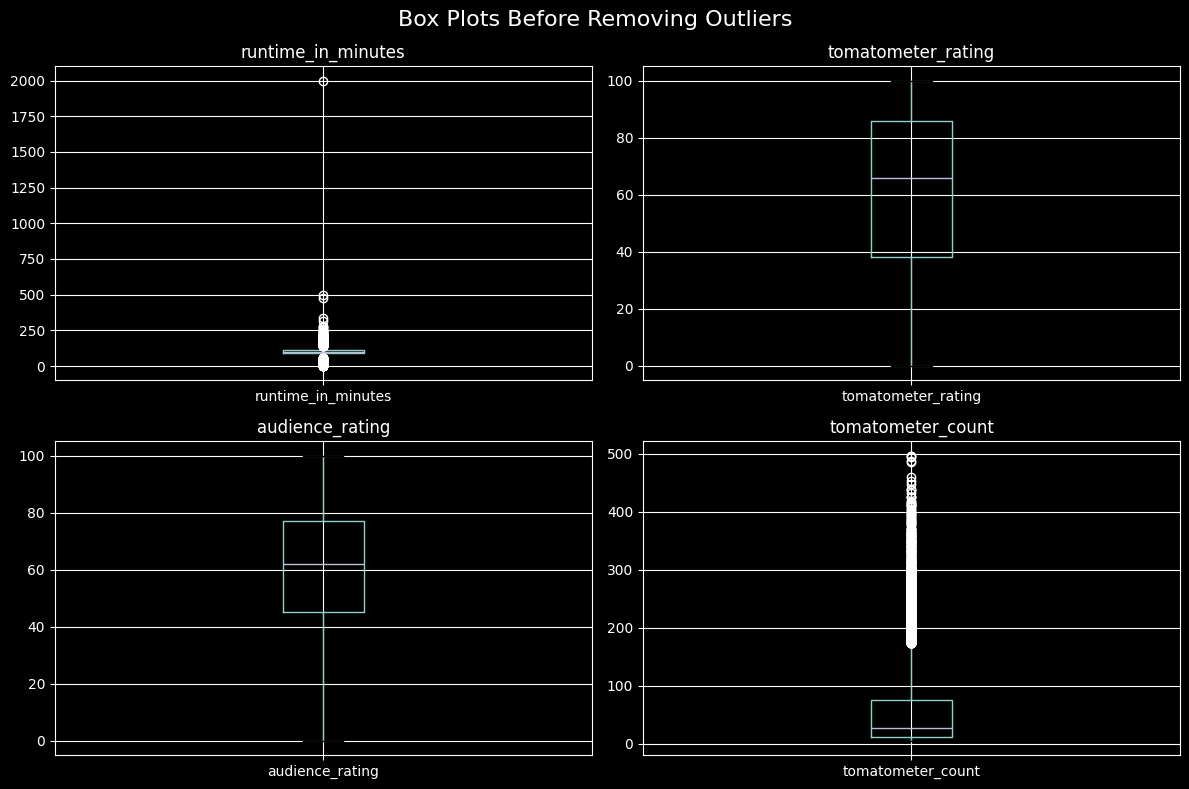

Number of rows with outliers before removal: 2019


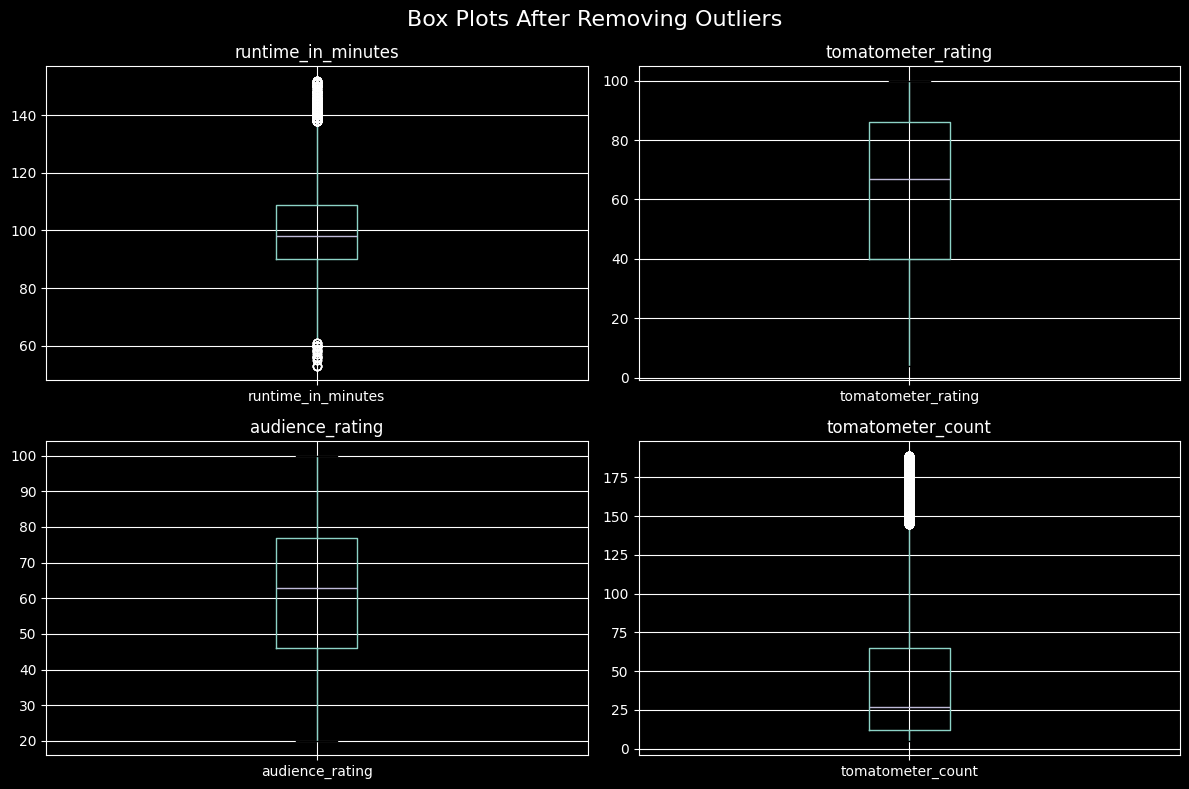

Number of rows after removing outliers: 14619


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the dark_background style
plt.style.use('dark_background')

# Define the numerical columns to check for outliers
numerical_columns = ['runtime_in_minutes', 'tomatometer_rating', 'audience_rating', 'tomatometer_count']

# Create box plots before removing outliers
plt.figure(figsize=(12, 8))
plt.suptitle('Box Plots Before Removing Outliers', fontsize=16)

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    df.boxplot(column=[column])
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

# Calculate z-scores for numerical columns
z_scores = pd.DataFrame()
for column in numerical_columns:
    z_scores[column] = (df[column] - df[column].mean()) / df[column].std()

# Set a z-score threshold to identify outliers
z_score_threshold = 2

# Identify outliers based on z-scores
outliers = z_scores[(z_scores.abs() > z_score_threshold).any(axis=1)]

# Display the number of rows with outliers before removal
print("Number of rows with outliers before removal:", len(outliers))

# Remove outliers and create a new DataFrame
df_cleaned = df[~((z_scores.abs() > z_score_threshold).any(axis=1))]

# Create box plots after removing outliers
plt.figure(figsize=(12, 8))
plt.suptitle('Box Plots After Removing Outliers', fontsize=16)

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    df_cleaned.boxplot(column=[column])
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

# Display the number of rows after removing outliers
print("Number of rows after removing outliers:", len(df_cleaned))

## Univariate analysis

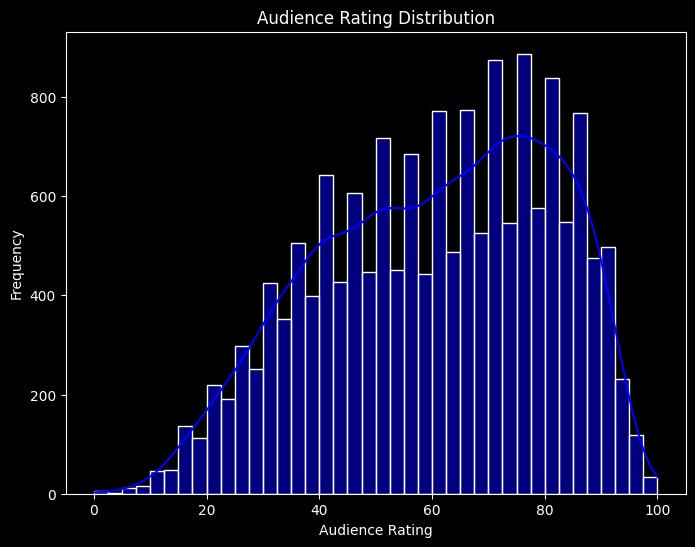

In [19]:
# 1. Audience Rating Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['audience_rating'], kde=True, color='blue')
plt.title('Audience Rating Distribution')
plt.xlabel('Audience Rating')
plt.ylabel('Frequency')
plt.show()

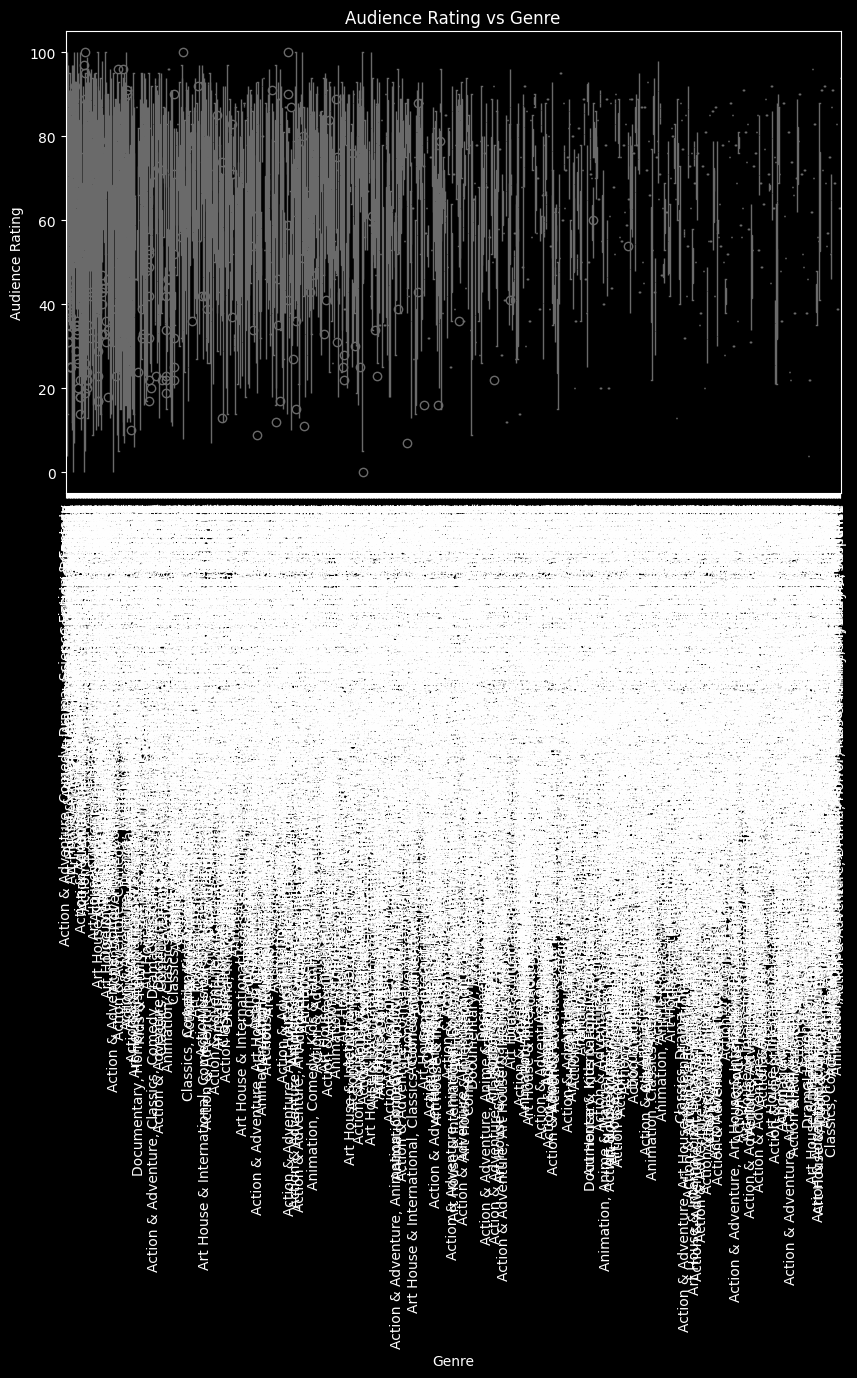

In [20]:
# 2. Rating vs Genre (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='audience_rating', data=df)
plt.title('Audience Rating vs Genre')
plt.xlabel('Genre')
plt.ylabel('Audience Rating')
plt.xticks(rotation=90)
plt.show()


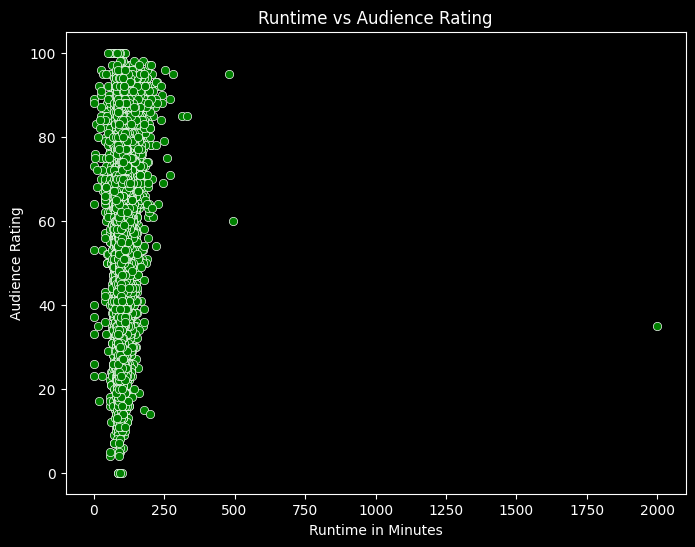

In [21]:
# 4. Runtime vs Audience Rating (Scatter Plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='runtime_in_minutes', y='audience_rating', data=df, color='green')
plt.title('Runtime vs Audience Rating')
plt.xlabel('Runtime in Minutes')
plt.ylabel('Audience Rating')
plt.show()

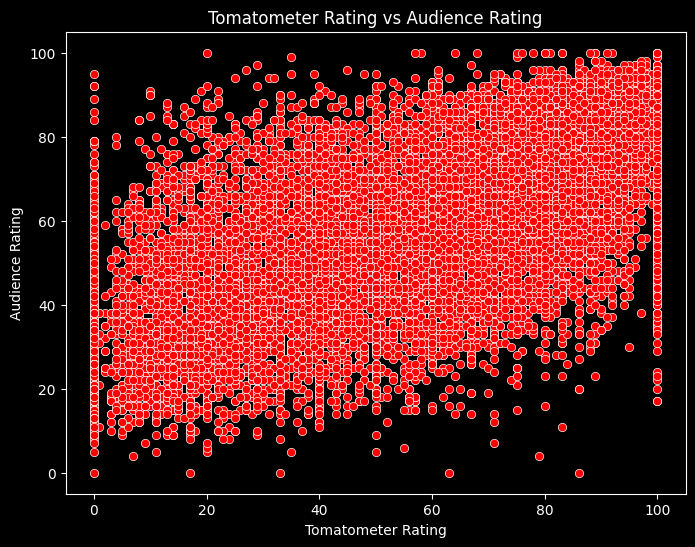

In [22]:
# 5. Tomatometer Rating vs Audience Rating (Scatter Plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tomatometer_rating', y='audience_rating', data=df, color='red')
plt.title('Tomatometer Rating vs Audience Rating')
plt.xlabel('Tomatometer Rating')
plt.ylabel('Audience Rating')
plt.show()

## Bivariate Analysis

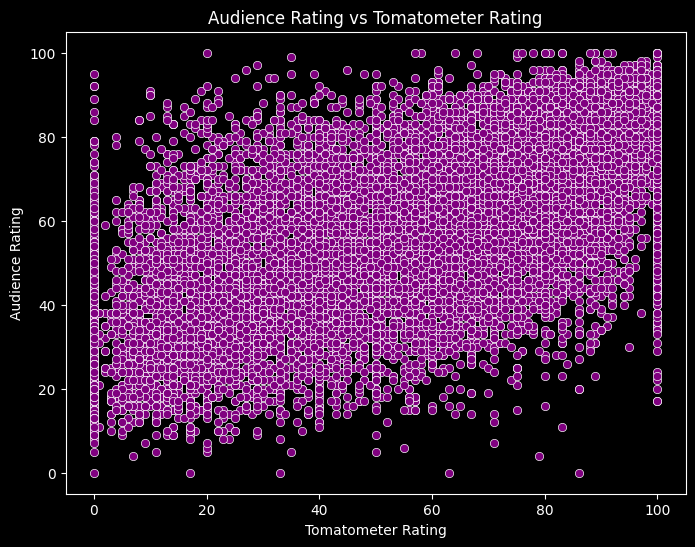

Correlation between Tomatometer Rating and Audience Rating: 0.660110953553352


In [23]:
# 1. Audience Rating vs Tomatometer Rating (Scatter Plot & Correlation)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tomatometer_rating', y='audience_rating', data=df, color='purple')
plt.title('Audience Rating vs Tomatometer Rating')
plt.xlabel('Tomatometer Rating')
plt.ylabel('Audience Rating')
plt.show()

# Correlation between Tomatometer Rating and Audience Rating
correlation = df['tomatometer_rating'].corr(df['audience_rating'])
print(f'Correlation between Tomatometer Rating and Audience Rating: {correlation}')


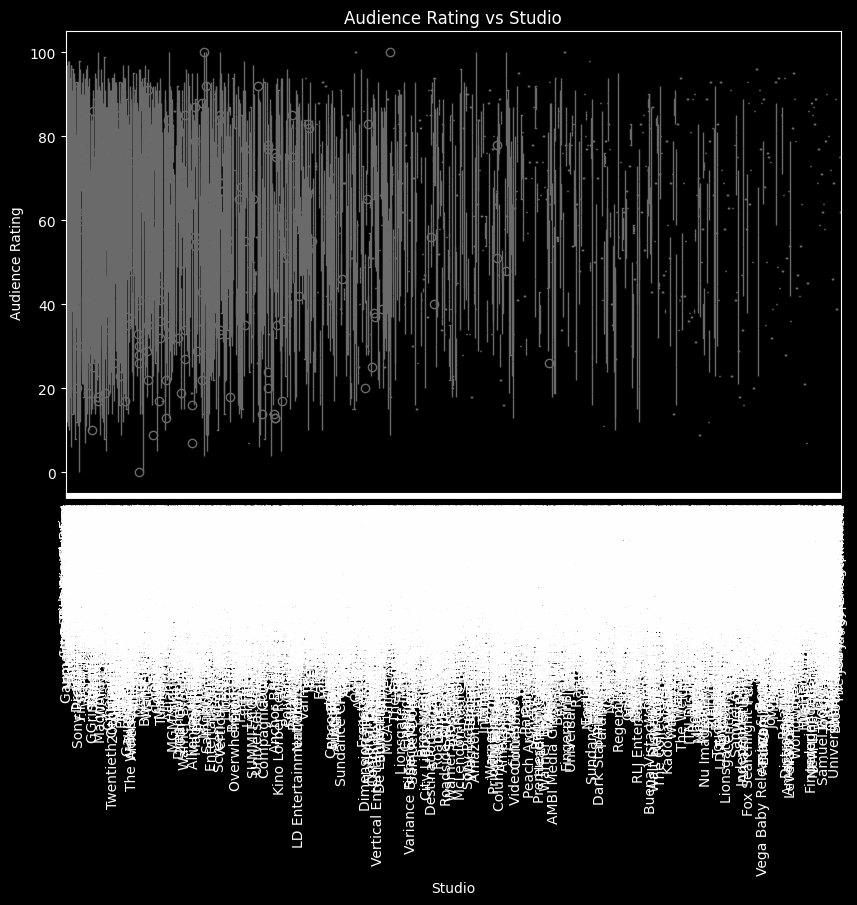

Average Audience Rating by Studio:
studio_name
10 West Studios     68.0
108 Pics            41.0
1091                75.0
120 Degree Films    26.0
1428 Films          76.0
                    ... 
eRealBiz            70.0
iHQ                 40.0
levelFILM           55.0
nWave Pictures      47.0
s                   72.0
Name: audience_rating, Length: 2886, dtype: float64


In [24]:
# 3. Audience Rating vs Studio (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='studio_name', y='audience_rating', data=df)
plt.title('Audience Rating vs Studio')
plt.xlabel('Studio')
plt.ylabel('Audience Rating')
plt.xticks(rotation=90)
plt.show()

# Print average audience rating by studio
studio_rating = df.groupby('studio_name')['audience_rating'].mean()
print("Average Audience Rating by Studio:")
print(studio_rating)


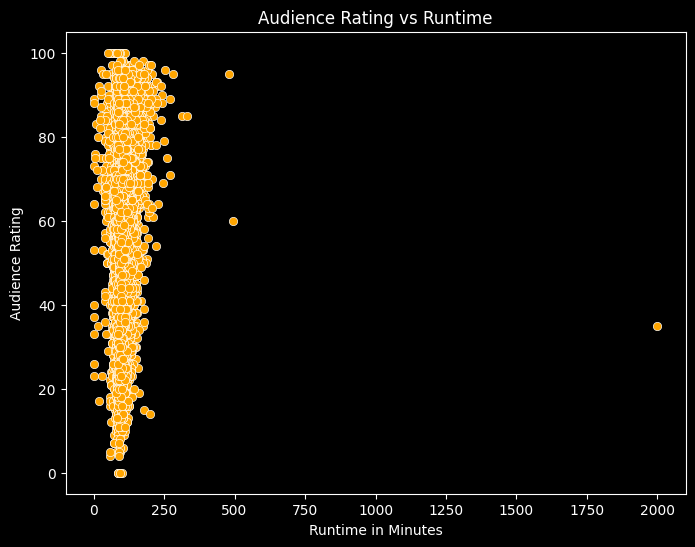

Correlation between Runtime and Audience Rating: 0.1685066703124791


In [25]:
# 4. Audience Rating vs Runtime (Scatter Plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='runtime_in_minutes', y='audience_rating', data=df, color='orange')
plt.title('Audience Rating vs Runtime')
plt.xlabel('Runtime in Minutes')
plt.ylabel('Audience Rating')
plt.show()

# Print correlation between runtime and audience rating
runtime_correlation = df['runtime_in_minutes'].corr(df['audience_rating'])
print(f'Correlation between Runtime and Audience Rating: {runtime_correlation}')

## Multivariate Analysis

Correlation Matrix:
                    runtime_in_minutes  tomatometer_rating  tomatometer_count  \
runtime_in_minutes            1.000000            0.071270           0.191975   
tomatometer_rating            0.071270            1.000000           0.079565   
tomatometer_count             0.191975            0.079565           1.000000   
audience_rating               0.168507            0.660111           0.141012   

                    audience_rating  
runtime_in_minutes         0.168507  
tomatometer_rating         0.660111  
tomatometer_count          0.141012  
audience_rating            1.000000  


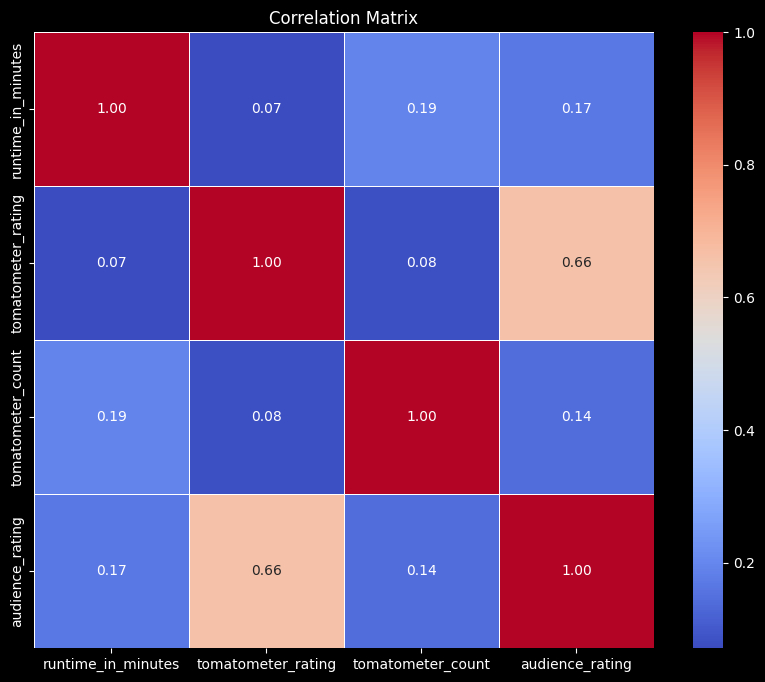


Pairplot Variables:
['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count', 'audience_rating']


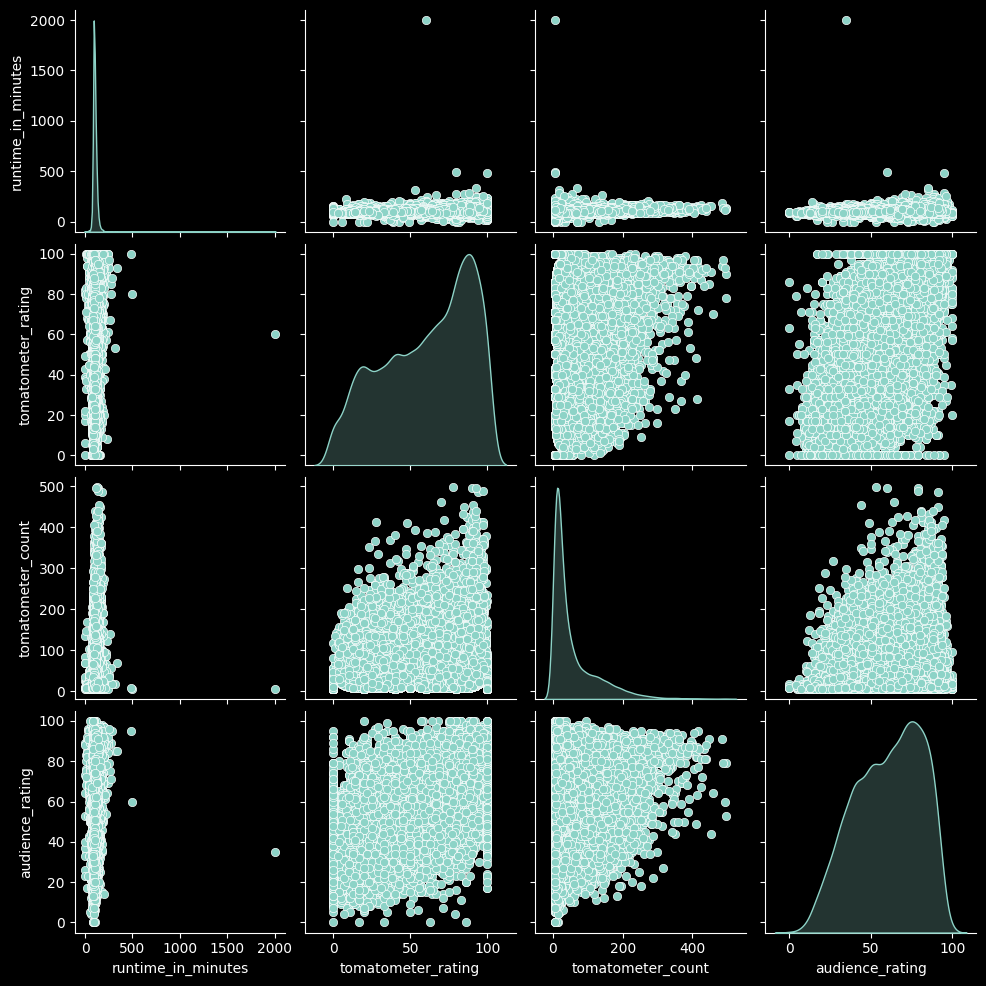

In [26]:
# 1. Correlation Matrix
print("Correlation Matrix:")

# Selecting only numeric columns for correlation
numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

# Print the correlation matrix
print(correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 2. Pairplot
# Print selected numeric columns
print("\nPairplot Variables:")
print(numeric_columns.columns.tolist())

# Display pairplot for numeric columns
sns.pairplot(numeric_columns, diag_kind='kde', kind='scatter', palette='husl')
plt.show()

In [18]:
df.isnull().sum().sort_values(ascending=False)

movie_title           0
movie_info            0
rating                0
genre                 0
directors             0
writers               0
cast                  0
in_theaters_date      0
on_streaming_date     0
runtime_in_minutes    0
studio_name           0
tomatometer_status    0
tomatometer_rating    0
tomatometer_count     0
audience_rating       0
dtype: int64

## Data Preprocessing

In [19]:
# 1. Assign the target variable (y) and independent variables (X)
target_column = 'audience_rating'
X = df.drop(columns=[target_column])  # Independent variables
y = df[target_column]  # Target variable

# Print the shapes of X and y to verify
print("Shape of independent variables (X):", X.shape)
print("Shape of target variable (y):", y.shape)

Shape of independent variables (X): (14090, 14)
Shape of target variable (y): (14090,)


In [21]:
y.isnull().sum()

np.int64(0)

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
# Define preprocessing for numerical and categorical features
numerical_columns = X.select_dtypes(include=['number']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())  # Scaling for numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding for categorical features
])

# Combine preprocessors in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

# Define a pipeline with preprocessing and a model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())  # Start with Linear Regression
])


In [52]:
from sklearn.preprocessing import MaxAbsScaler

# Define a pipeline with preprocessing and a model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', MaxAbsScaler()),  # Use MaxAbsScaler instead
    ('model', LinearRegression())
])


## # Split the data into training and testing data 

In [53]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
# Fit the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['movie_title', 'movie_info', 'rating', 'genre', 'directors', 'writers',
       'cast', 'in_theaters_date', 'on_streaming_date', 'studio_name',
       'tomatometer_status'],
      dtype='object'))])),
                ('scaler', MaxAbsScaler()), ('model', LinearRegression())])

In [55]:
# Evaluate the model
y_pred_test = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)
print("Linear Regression Model Evaluation:")
print(f"Test Mean Squared Error: {mean_squared_error(y_test, y_pred_test)}")
print(f"Test R-squared (R^2) Score: {r2_score(y_test, y_pred_test)}")
print(f"Train Mean Squared Error: {mean_squared_error(y_train, y_pred_train)}")
print(f"Train R-squared (R^2) Score: {r2_score(y_train, y_pred_train)}")

Linear Regression Model Evaluation:
Test Mean Squared Error: 192.81595843191795
Test R-squared (R^2) Score: 0.5317031248146014
Train Mean Squared Error: 2.583452299038511e-06
Train R-squared (R^2) Score: 0.9999999937751781


In [56]:
# Switch model to Random Forest Regressor
pipeline.set_params(model=RandomForestRegressor(random_state=42))
pipeline.fit(X_train, y_train)
y_pred_test = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)
print("Random Forest Regressor Model Evaluation:")
print(f"Test Mean Squared Error: {mean_squared_error(y_test, y_pred_test)}")
print(f"Test R-squared (R^2) Score: {r2_score(y_test, y_pred_test)}")
print(f"Train Mean Squared Error: {mean_squared_error(y_train, y_pred_train)}")
print(f"Train R-squared (R^2) Score: {r2_score(y_train, y_pred_train)}")

Random Forest Regressor Model Evaluation:
Test Mean Squared Error: 201.36637575112377
Test R-squared (R^2) Score: 0.5109365153250189
Train Mean Squared Error: 29.22870192639157
Train R-squared (R^2) Score: 0.9295735160861522


In [57]:
# Switch model to Gradient Boosting Regressor
pipeline.set_params(model=GradientBoostingRegressor(random_state=42))
pipeline.fit(X_train, y_train)
y_pred_test = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)
print("Gradient Boosting Regressor Model Evaluation:")
print(f"Test Mean Squared Error: {mean_squared_error(y_test, y_pred_test)}")
print(f"Test R-squared (R^2) Score: {r2_score(y_test, y_pred_test)}")
print(f"Train Mean Squared Error: {mean_squared_error(y_train, y_pred_train)}")
print(f"Train R-squared (R^2) Score: {r2_score(y_train, y_pred_train)}")

Gradient Boosting Regressor Model Evaluation:
Test Mean Squared Error: 192.89488641701539
Test R-squared (R^2) Score: 0.5315114304699713
Train Mean Squared Error: 185.72264649054628
Train R-squared (R^2) Score: 0.5525017495322462
